# Intro
Dataset used in this model training task was sourced from a publicly available source(GeeksforGeeks). It contains 25000 reviews with sentiments.
We will be using this dataset to train three models:
1. Logistical Regression
2. Support Vector Machine
3. Naive Bayes Classifier
We will compare these 3 to find out the best performing model that will help us to develop our project.

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Preprocesing
1. Check for null values
2. Drop null value columns
3. Classify as +ve or -ve sentiment

In [9]:
reviews = pd.read_csv('AmazonReview.csv')
reviews.head()



,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


Check number of null entries

In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


Drop null value columns

In [12]:
reviews.dropna(inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24999 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  24999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


Classify all reviews into either negative(0) or positive(1) based on the sentiment values provided.

In [16]:
# make less than 3 sentiment as negative
reviews.loc[reviews['Sentiment']<=3,'Sentiment'] = 0

# make more than 3 sentiment as positive
reviews.loc[reviews['Sentiment']>3,'Sentiment'] = 1


Remove useless words (stopwords) that dont play a role in analysis.

In [17]:
stp_words=stopwords.words('english')
def clean_review(review):
    cleanreview=" ".join(word for word in review.
                        split() if word not in stp_words)
    return cleanreview

reviews['Review']=reviews['Review'].apply(clean_review)


In [21]:
reviews.head()



,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [22]:
reviews['Sentiment'].value_counts()

Sentiment
0    15000
1     9999
Name: count, dtype: int64

Creating WordCloud of all words with negative(0) sentiment

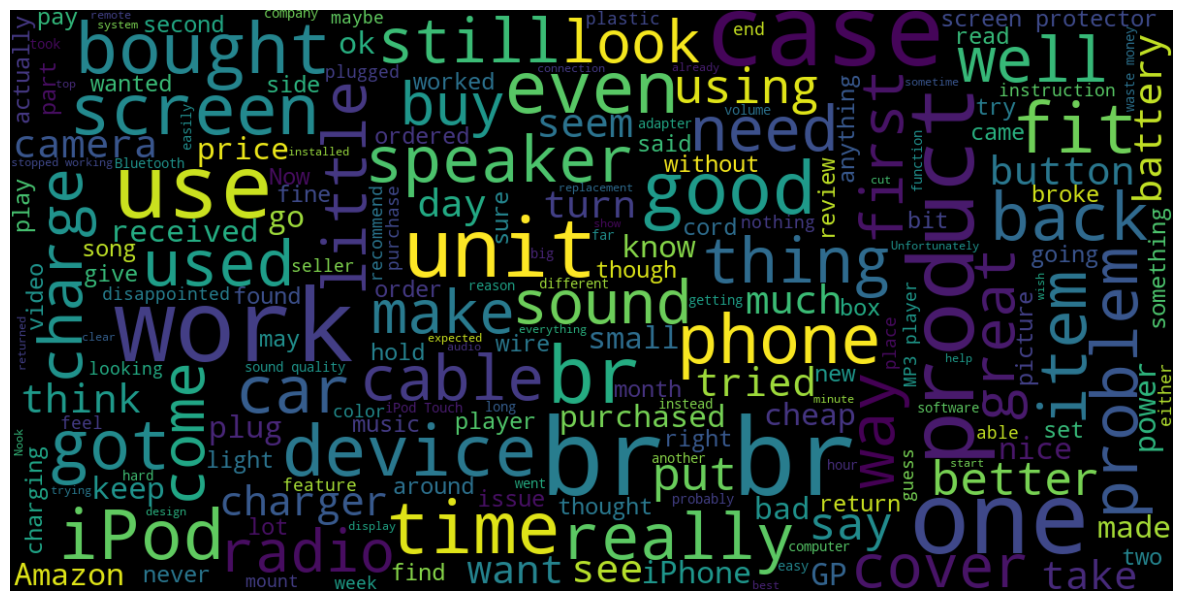

In [24]:
consolidated=' '.join(word for word in reviews['Review'][reviews['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1200,height=600,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


Creating WordCloud of all words with positive(1) sentiment

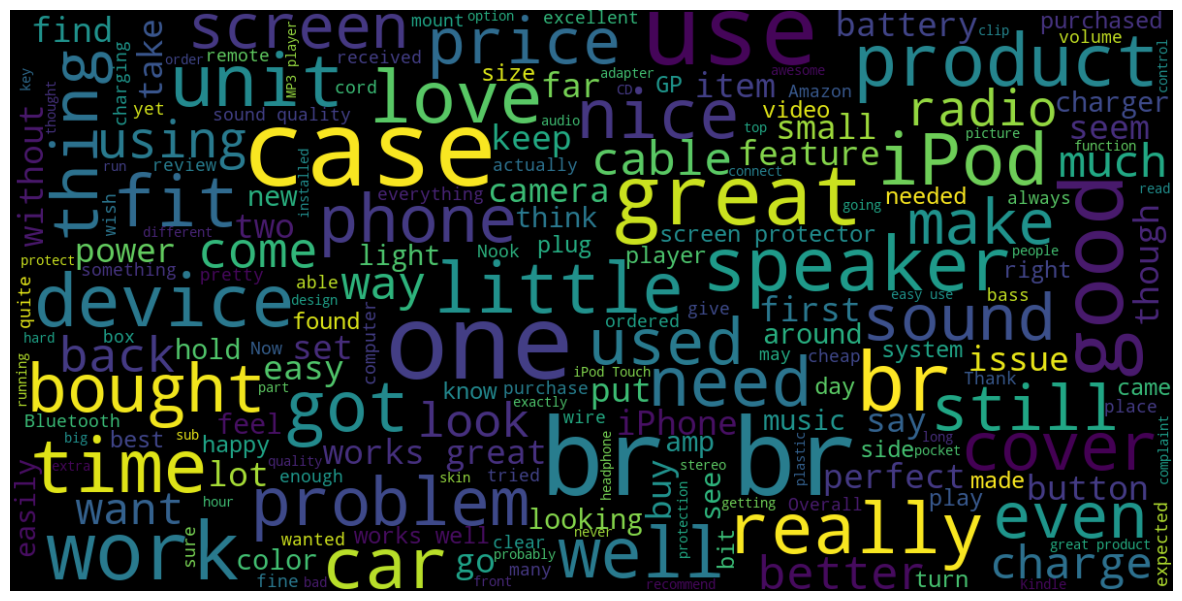

In [26]:
consolidated=' '.join(word for word in reviews['Review'][reviews['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1200,height=600,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


# Model training & evaluation

Transform reviews(text) into a matrix of TF-IDF features( frequency of words matrix) that can be used by the machine learning algorithms.

In [27]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(reviews['Review'] ).toarray()

Split into test & train datasets

In [29]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,reviews['Sentiment'],
												test_size=0.25 ,
												random_state=42)


# Model 1: Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


sentiment_model_logReg=LogisticRegression()

#Model fitting
sentiment_model_logReg.fit(x_train,y_train)

#testing the model
pred=sentiment_model_logReg.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))


0.81632


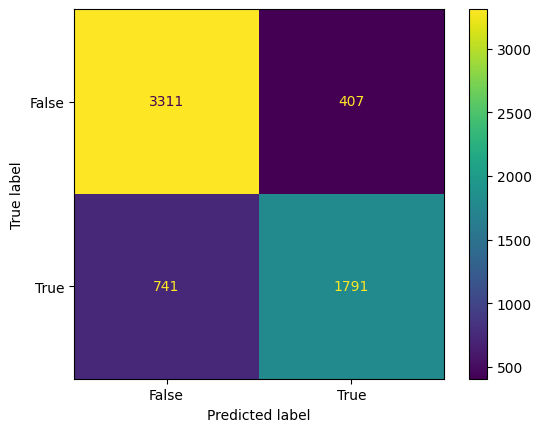

In [35]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()


# Model 2: Support Vector Machines (SVM)

In [37]:
from sklearn import svm

# Model creation
sentiment_model_svm = svm.SVC()

# Model fitting
sentiment_model_svm.fit(x_train, y_train)

# Testing the model
pred = sentiment_model_svm.predict(x_test)

# Model accuracy
print(accuracy_score(y_test, pred))


0.8176


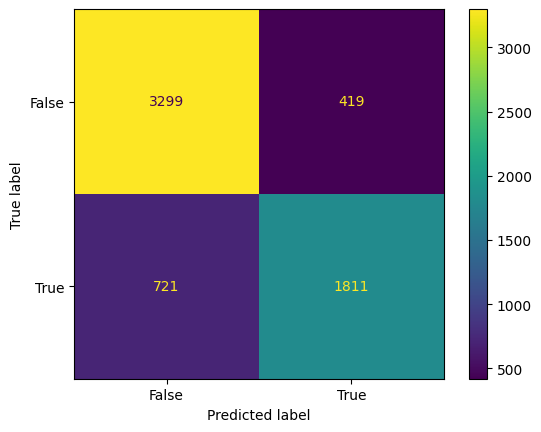

In [38]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()


# Model 3: Naive Bayes Classifier

In [39]:
from sklearn.naive_bayes import MultinomialNB

# Model creation
sentiment_model_nbc = MultinomialNB()

# Model fitting
sentiment_model_nbc.fit(x_train, y_train)

# Testing the model
pred = sentiment_model_nbc.predict(x_test)

# Model accuracy
print(accuracy_score(y_test, pred))


0.78944


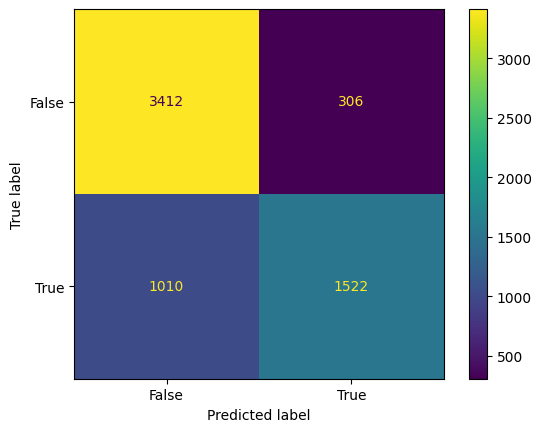

In [40]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()


# Accuracy & prediction comparison

Accuracy of Logistic Regression: 0.81632
Accuracy of SVM: 0.8176
Accuracy of Naive Bayes: 0.78944


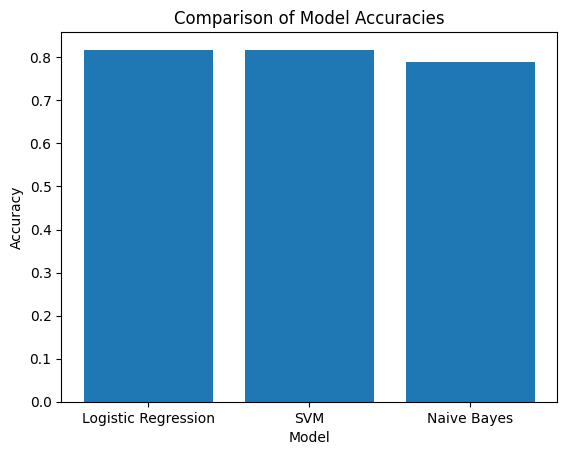

In [43]:
import matplotlib.pyplot as plt

# Calculate the accuracy of each model
accuracy_model_1 = accuracy_score(y_test, sentiment_model_logReg.predict(x_test))
accuracy_model_2 = accuracy_score(y_test, sentiment_model_svm.predict(x_test))
accuracy_model_3 = accuracy_score(y_test, sentiment_model_nbc.predict(x_test))

# Print the accuracy of each model
print(f'Accuracy of Logistic Regression: {accuracy_model_1}')
print(f'Accuracy of SVM: {accuracy_model_2}')
print(f'Accuracy of Naive Bayes: {accuracy_model_3}')

# Create a bar plot to compare the accuracy of each model
plt.bar(['Logistic Regression', 'SVM', 'Naive Bayes'], [accuracy_model_1, accuracy_model_2, accuracy_model_3])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


# Conclusion

From the above comparison of accuracies, it is observed that Naive Bayes Classifier performs the worst in our case.
Both SVM & Logistical perform similarly in terms of accuracy. 
Hence we shall go with either of these two for further project work.